In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Statistical Mechanics
## Distribution of particles
Consider an ideal gas of $N$ particles in a constant volume at
constant energy. Let us divide the volume in $p$ identical
compartments. Every compartment contains $n_i$ molecules such that
\begin{equation}
N = \sum_{i=1}^{i=p} n_i
\end{equation}
An interesting quantity is the distribution of molecules over the $p$
compartments. Because the energy is constant, every possible
eigenstate of the system will be equally likely. This means that in
principle it is possible that one of the compartments is empty.

![compartments](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/12024/16bce63d5f434ada85f9682269503bb5/1b690c48-e5d7-47e3-8494-3cc9c5b79bc9.png)

*An ideal gas of $N=1000$ particles in a constant volume at constant energy. The volume is divided into $p=81$ compartments. The snapshot is obtained by randomly distributing $N=1000$ particles over $p=81$ compartments.*

1. Below is a function `allocate_compartments` calculates the distribution of
$N$ molecules along the $p$ compartments.
Note that the code has to be completed first!
Evaluate the function for different numbers of compartments ($p$) and total number of gas molecules
($N$), and plot the results.

In [2]:
import numpy as np

def allocate_compartments(n: int, p: int, samples: int) -> np.ndarray:
    """
    Distribute n particles among p compartments.
    Compute the distribution of compartment occupancy, averaged over "samples" samples.
    """
    occupancy = np.zeros(p, dtype=int)
    distribution = np.zeros(n + 1, dtype=float)  # Size n+1 to store counts from 0 to n

    for _ in range(samples):
        occupancy[:] = 0
        compartments = np.random.randint(0, p, n)
        # core code
        """
        sample n times in compartments, so each element in compartments is a random number from 0 to p-1
        """
        for compartment_index in compartments:
            occupancy[compartment_index] += 1
        for count in occupancy:
            distribution[count] += 1

    return distribution / samples / p


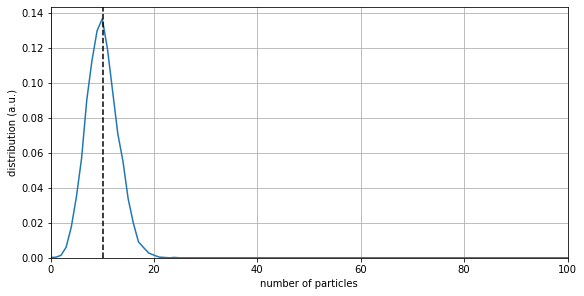

In [3]:
n, p, samples = 100, 10, 1_000

fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
ax.set_xlabel("number of particles")
ax.set_ylabel('distribution (a.u.)')

distribution = allocate_compartments(n, p, samples)
ax.plot(distribution)

ax.set_xlim([0, n])
ax.set_ylim(0, None)
ax.axvline((n+1)/p, color='k', linestyle='--')
ax.grid()

plt.show()

2. Homework question: why does it (almost) never happen that one of the compartments is empty when $N/P >> 1$?

3. Homework question: Consider the case of $p=2$. The probability
  of finding $n_1$ molecules in compartment $1$ and $n_2=N-n_1$
  molecules in compartment $2$ is given by
\begin{equation}
P\left(n_1\right) = \frac{N!}{n_1 ! \times \left(N-n_1\right) ! \times
2^N}
\end{equation}
Compare your numerical results results with the analytical solution
for different values of $N$. Show that this distribution is a Gaussian
for $1 << n_1 << N$. Hint: For $x>10$, it might be useful to use
Stirling's approximation:
\begin{equation} x! \approx \left(2 \pi\right)^{\frac{1}{2}} x^{x+ \frac{1}{2}}\exp\left[-x\right]
\end{equation}

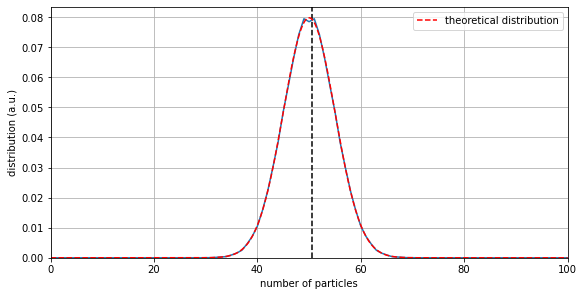

In [7]:
n, p, samples = 100, 2, int(1e5)

fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
ax.set_xlabel("number of particles")
ax.set_ylabel('distribution (a.u.)')

distribution = allocate_compartments(n, p, samples)
ax.plot(distribution)

ax.set_xlim([0, n])
ax.set_ylim(0, None)
ax.axvline((n+1)/p, color='k', linestyle='--')
ax.grid()

# plot theoretical distribution
# p(x) = \sqrt(2/\piN) * exp(-2*(x-N/2)^2/N)

x = np.linspace(0, n, 4*(n+1))
y = np.sqrt(2/(np.pi*n)) * np.exp(-2*(x-n/2)**2/n)
plt.plot(x, y, 'r--', label='theoretical distribution')
ax.legend()
plt.show()

**1. 二项分布**

* 我们有 $N$ 个例子，每个例子独立地、随机地被分配到两个类别中的一个。
* 假设这两个类别是 A 和 B。由于是随机分配，一个例子属于类别 A 的概率 $p = 1/2$，属于类别 B 的概率 $q = 1 - p = 1/2$。
* 我们想计算类别 A 中恰好有 $n$ 个例子的概率。
* 这是一个典型的二项分布问题。其概率质量函数 (PMF) 为：
    $$P(n; N, p) = \binom{N}{n} p^n q^{N-n}$$
* 在我们的特定情况下 ($p=q=1/2$)：
    $$P(n) = \binom{N}{n} \left(\frac{1}{2}\right)^n \left(\frac{1}{2}\right)^{N-n} = \binom{N}{n} \left(\frac{1}{2}\right)^N$$
* 展开组合数：
    $$P(n) = \frac{N!}{n!(N-n)!} \left(\frac{1}{2}\right)^N$$

**2. 引入斯特林近似 (Stirling's Approximation)**

当 $N$ 很大时，直接计算阶乘 $N!$ 会变得非常困难。斯特林公式为大数的阶乘提供了一个非常好的近似：
$$k! \approx \sqrt{2\pi k} \left(\frac{k}{e}\right)^k$$
为了方便计算，我们通常使用其对数形式：$$\ln(k!) \approx k \ln k - k + \frac{1}{2} \ln(2\pi k)$$更简化的形式（忽略 $\ln(2\pi k)$ 项，因为它相对于 $k \ln k - k$ 增长较慢）是：$$\ln(k!) \approx k \ln k - k$$
我们将使用更精确的形式来推导。

**3. 对 P(n) 取对数并应用斯特林近似**

对 $P(n)$ 的表达式取自然对数：
$$\ln P(n) = \ln\left(\frac{N!}{n!(N-n)!} \left(\frac{1}{2}\right)^N\right)$$
$$\ln P(n) = \ln(N!) - \ln(n!) - \ln((N-n)!) - N \ln 2$$
现在，将斯特林近似代入 $\ln(N!)$、$\ln(n!)$ 和 $\ln((N-n)!)$ (假设 $N$, $n$, 和 $N-n$ 都足够大)：
$$\ln P(n) \approx \left(N \ln N - N + \frac{1}{2} \ln(2\pi N)\right) \\ - \left(n \ln n - n + \frac{1}{2} \ln(2\pi n)\right) \\ - \left((N-n) \ln(N-n) - (N-n) + \frac{1}{2} \ln(2\pi (N-n))\right) \\ - N \ln 2$$
简化：注意 $-N$, $+n$, 和 $+(N-n)$ 项相互抵消。
$$\ln P(n) \approx N \ln N - n \ln n - (N-n) \ln(N-n) - N \ln 2 \\ + \frac{1}{2} [\ln(2\pi N) - \ln(2\pi n) - \ln(2\pi (N-n))]$$
$$\ln P(n) \approx N \ln N - n \ln n - (N-n) \ln(N-n) - N \ln 2 \\ + \frac{1}{2} \ln\left(\frac{2\pi N}{(2\pi n)(2\pi (N-n))}\right)$$
$$\ln P(n) \approx N \ln N - n \ln n - (N-n) \ln(N-n) - N \ln 2 \\ + \frac{1}{2} \ln\left(\frac{N}{2\pi n (N-n)}\right)$$

**4. 在期望值附近展开**

二项分布的期望值（均值）为 $\mu = Np$。在我们的例子中，$p=1/2$，所以 $\mu = N/2$。高斯分布在均值附近最为集中，因此我们将在 $n \approx N/2$ 附近进行近似。
设 $n = N/2 + \delta$，其中 $\delta$ 是 $n$ 相对于均值的偏差。我们假设 $\delta$ 远小于 $N/2$ (即 $|\delta| \ll N/2$)。
那么 $N-n = N - (N/2 + \delta) = N/2 - \delta$。

将 $n = N/2 + \delta$ 和 $N-n = N/2 - \delta$ 代入 $\ln P(n)$ 表达式中包含 $n$ 和 $N-n$ 的对数项：
主要部分：$N \ln N - n \ln n - (N-n) \ln(N-n) - N \ln 2$
$$= N \ln N - (N/2 + \delta) \ln(N/2 + \delta) - (N/2 - \delta) \ln(N/2 - \delta) - N \ln 2$$
$$= N \ln N - (N/2 + \delta) \ln\left(\frac{N}{2}(1 + \frac{2\delta}{N})\right) - (N/2 - \delta) \ln\left(\frac{N}{2}(1 - \frac{2\delta}{N})\right) - N \ln 2$$
利用 $\ln(ab) = \ln a + \ln b$:$$= N \ln N - (N/2 + \delta)[\ln(N/2) + \ln(1 + \frac{2\delta}{N})] - (N/2 - \delta)[\ln(N/2) + \ln(1 - \frac{2\delta}{N})] - N \ln 2$$
$$= N \ln N - [(N/2+\delta) + (N/2-\delta)]\ln(N/2) - N\ln 2 \\ - (N/2 + \delta)\ln(1 + \frac{2\delta}{N}) - (N/2 - \delta)\ln(1 - \frac{2\delta}{N})$$
$$= N \ln N - N\ln(N/2) - N\ln 2 - (N/2 + \delta)\ln(1 + \frac{2\delta}{N}) - (N/2 - \delta)\ln(1 - \frac{2\delta}{N})$$
注意到 $N \ln N - N\ln(N/2) = N (\ln N - \ln(N/2)) = N \ln(N/(N/2)) = N \ln 2$。所以前三项抵消：
$$= - (N/2 + \delta)\ln(1 + \frac{2\delta}{N}) - (N/2 - \delta)\ln(1 - \frac{2\delta}{N})$$
现在，使用泰勒展开 $\ln(1+x) \approx x - x^2/2$ 对小的 $x$ 成立。这里 $x = \pm 2\delta/N$，由于 $|\delta| \ll N/2$，这个值很小。
* $\ln(1 + 2\delta/N) \approx (2\delta/N) - (1/2)(2\delta/N)^2 = \frac{2\delta}{N} - \frac{2\delta^2}{N^2}$
* $\ln(1 - 2\delta/N) \approx (-2\delta/N) - (1/2)(-2\delta/N)^2 = -\frac{2\delta}{N} - \frac{2\delta^2}{N^2}$

代入展开式：
$$\approx - (N/2 + \delta)\left(\frac{2\delta}{N} - \frac{2\delta^2}{N^2}\right) - (N/2 - \delta)\left(-\frac{2\delta}{N} - \frac{2\delta^2}{N^2}\right)$$
展开并保留到 $\delta^2$ 阶（忽略 $\delta^3$ 及更高阶项，因为它们更小）：
$$\approx - \left(\frac{N}{2}\frac{2\delta}{N} + \delta\frac{2\delta}{N} - \frac{N}{2}\frac{2\delta^2}{N^2} \dots\right) - \left(\frac{N}{2}(-\frac{2\delta}{N}) - \delta(-\frac{2\delta}{N}) - \frac{N}{2}(-\frac{2\delta^2}{N^2}) \dots\right)$$
$\approx - \left(\delta + \frac{2\delta^2}{N} - \frac{\delta^2}{N} \dots\right) - \left(-\delta + \frac{2\delta^2}{N} + \frac{\delta^2}{N} \dots\right)$$
$$\approx - \left(\delta + \frac{\delta^2}{N}\right) - \left(-\delta + \frac{3\delta^2}{N}\right)$$
嗯，重新仔细展开一下：
$$\approx - \left[ (N/2)(2\delta/N) + \delta(2\delta/N) - (N/2)(2\delta^2/N^2) - \delta(2\delta^2/N^2) \right] \\ - \left[ (N/2)(-2\delta/N) - \delta(-2\delta/N) - (N/2)(2\delta^2/N^2) + \delta(2\delta^2/N^2) \right]$$
$$\approx - \left[ \delta + \frac{2\delta^2}{N} - \frac{\delta^2}{N} - \frac{2\delta^3}{N^2} \right] - \left[ -\delta + \frac{2\delta^2}{N} - \frac{\delta^2}{N} + \frac{2\delta^3}{N^2} \right]$$
$$\approx - \left[ \delta + \frac{\delta^2}{N} \right] - \left[ -\delta + \frac{\delta^2}{N} \right]$$ 
(忽略 $\delta^3$ 项)
$$= -\delta - \frac{\delta^2}{N} + \delta - \frac{\delta^2}{N} = -\frac{2\delta^2}{N}$$

现在考虑 $\ln P(n)$ 中的常数项部分（使用 $n \approx N/2$ 和 $N-n \approx N/2$）：
$$\frac{1}{2} \ln\left(\frac{N}{2\pi n (N-n)}\right) \approx \frac{1}{2} \ln\left(\frac{N}{2\pi (N/2) (N/2)}\right)$$
$$= \frac{1}{2} \ln\left(\frac{N}{2\pi (N^2/4)}\right) = \frac{1}{2} \ln\left(\frac{4N}{2\pi N^2}\right)$$
$$= \frac{1}{2} \ln\left(\frac{2}{\pi N}\right) = \ln\left(\sqrt{\frac{2}{\pi N}}\right)$$

**5. 合并结果**

将两部分近似结果合并得到 $\ln P(n)$ 的近似值：
$$\ln P(n) \approx -\frac{2\delta^2}{N} + \ln\left(\sqrt{\frac{2}{\pi N}}\right)$$

**6. 指数化得到 P(n) 的近似**

对上式进行指数化：
$$P(n) = e^{\ln P(n)} \approx e^{-\frac{2\delta^2}{N} + \ln\left(\sqrt{\frac{2}{\pi N}}\right)}$$
$$P(n) \approx e^{\ln\left(\sqrt{\frac{2}{\pi N}}\right)} e^{-\frac{2\delta^2}{N}}$$
$$P(n) \approx \sqrt{\frac{2}{\pi N}} e^{-\frac{2\delta^2}{N}}$$

**7. 写成高斯分布形式**

将 $\delta = n - N/2$ 代回：
$$P(n) \approx \sqrt{\frac{2}{\pi N}} e^{-\frac{2(n-N/2)^2}{N}}$$
这正是高斯（正态）分布的形式。我们来验证一下。
对于二项分布 $B(N, p)$，当 $N$ 很大时，可以用均值为 $\mu = Np$、方差为 $\sigma^2 = Npq$ 的正态分布来近似。
在我们的例子中，$p=1/2$, $q=1/2$，所以：
* 均值 $\mu = N(1/2) = N/2$
* 方差 $\sigma^2 = N(1/2)(1/2) = N/4$
* 标准差 $\sigma = \sqrt{N/4} = \sqrt{N}/2$

标准正态分布的概率密度函数 (PDF) 为：
$$f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
将我们的均值和方差代入：
$$f(n; N/2, N/4) = \frac{1}{\sqrt{2\pi(N/4)}} e^{-\frac{(n-N/2)^2}{2(N/4)}}$$
$$= \frac{1}{\sqrt{\pi N/2}} e^{-\frac{(n-N/2)^2}{N/2}}$$
$$= \sqrt{\frac{2}{\pi N}} e^{-\frac{2(n-N/2)^2}{N}}$$
这与我们使用斯特林近似推导出的结果完全一致。

**结论**

通过对二项分布概率公式 $P(n) = \frac{N!}{n!(N-n)!} (\frac{1}{2})^N$ 应用斯特林近似（特别是其对数形式），并在均值 $n=N/2$ 附近进行泰勒展开，我们成功地推导出了当 $N$ 很大时，该二项分布可以用一个均值为 $N/2$、方差为 $N/4$ 的高斯分布来近似：
$$P(n) \approx \frac{1}{\sqrt{2\pi(N/4)}} e^{-\frac{(n-N/2)^2}{2(N/4)}} = \sqrt{\frac{2}{\pi N}} e^{-\frac{2(n-N/2)^2}{N}}$$
这个结果是中心极限定理的一个具体体现。